In [49]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.date = pd.to_datetime(df.date)
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df['weekday'] = df.date.dt.day_name()

In [5]:
df = df.set_index('date').sort_index()
df


,temp,weekday
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday
...,...,...
2010-12-31 19:00:00,50.4,Friday
2010-12-31 20:00:00,49.9,Friday
2010-12-31 21:00:00,49.4,Friday


<AxesSubplot:xlabel='date'>

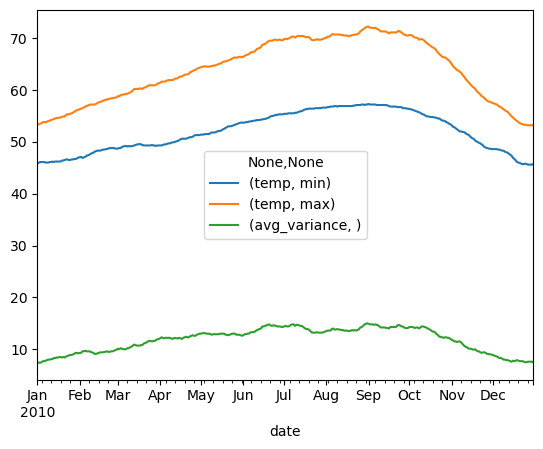

In [43]:
df.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

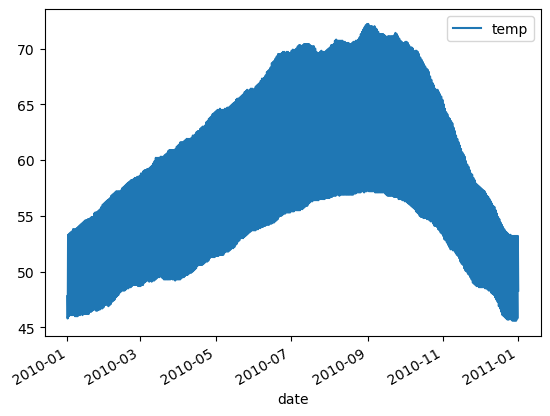

In [7]:
df.plot()

In [8]:
min_df = df.resample('M').min()

<AxesSubplot:xlabel='date'>

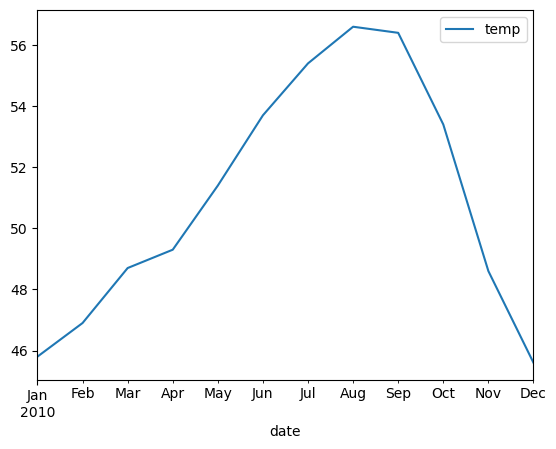

In [9]:
min_df.plot()

In [10]:
max_df = df.resample('M').max()

<AxesSubplot:xlabel='date'>

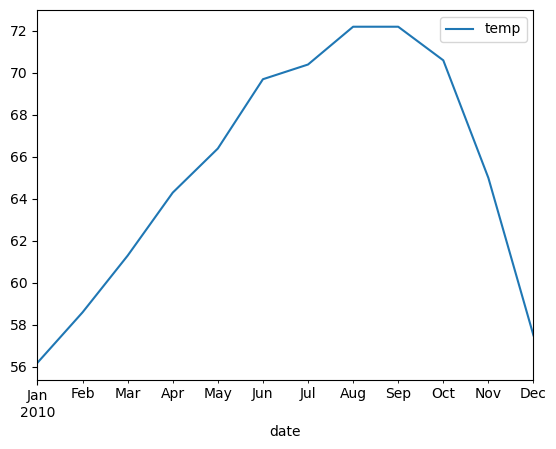

In [11]:
max_df.plot()

In [12]:
average_temp = df.resample('M').mean()

In [13]:
average_temp.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [14]:
average_temp.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [15]:
df = df.resample('D').agg(['min', 'max'])
df.shape

(365, 4)

In [16]:
df['avg_variance'] = df[('temp', 'max')] - df[('temp', 'min')]


In [17]:
df.resample('M').mean()['avg_variance'].idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

# -----------------------------2--------------------------------

In [18]:
df2 = data.seattle_weather()

In [19]:
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [20]:
df2['month'] = df2.date.dt.month
df2['year'] = df2.date.dt.year

In [21]:
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012


In [22]:
df2 = df2.set_index('date').sort_index()
df2

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,12,2015
2015-12-28,1.5,5.0,1.7,1.3,fog,12,2015
2015-12-29,0.0,7.2,0.6,2.6,fog,12,2015


In [23]:
monthly_prec = df2.resample('M').sum()

In [24]:
monthly_prec.head()

,precipitation,temp_max,temp_min,wind,month,year
date,,,,,,
2012-01-31,173.3,218.7,47.8,120.9,31,62372
2012-02-29,92.3,269.0,92.9,113.2,58,58348
2012-03-31,183.0,296.2,88.0,131.7,93,62372
2012-04-30,68.1,446.2,179.8,101.2,120,60360
2012-05-31,52.2,547.5,253.9,104.0,155,62372


In [25]:
monthly_prec['precipitation'].idxmax().strftime('%B %Y')

'December 2015'

<AxesSubplot:xlabel='date'>

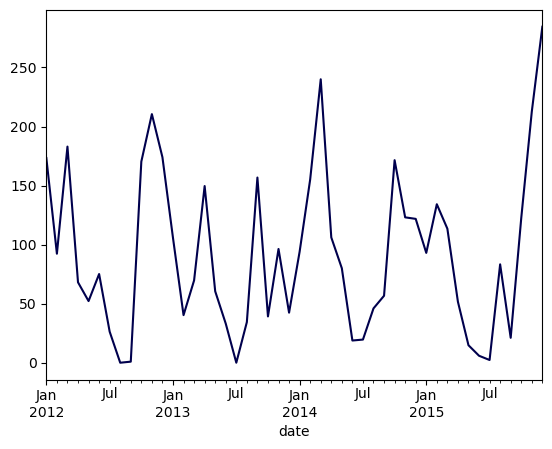

In [26]:
monthly_prec['precipitation'].plot(colormap = 'seismic')

In [27]:
wind_df = df2.resample('Q').mean()

<AxesSubplot:xlabel='date'>

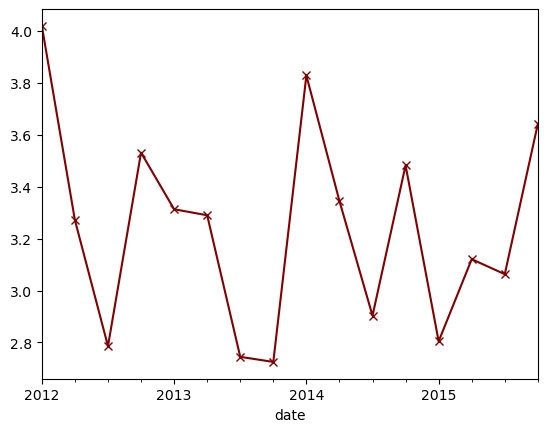

In [28]:
wind_df['wind'].plot(marker = 'x', colormap = 'seismic_r')

In [29]:
wind_df['wind'].idxmax().strftime('%B %Y')

'March 2012'

In [30]:
df2['rain_or_shine'] = df2['weather'] == 'sun'

In [31]:
sunny_df = df2.resample('y').sum()
sunny_df['rain_or_shine'].idxmax().strftime('%Y')

'2014'

In [42]:
most_rain = df2.resample('M').sum()
most_rain['precipitation'].idxmax().strftime('%B %Y')

'December 2015'

In [50]:
df2['rained'] = np.where(df2['precipitation'] == 0, 0, 1)
df2.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,rain_or_shine,rained
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,False,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1,2012,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1,2012,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,False,1


In [51]:
df2.resample('M').rained.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: rained, dtype: int64

In [52]:
df2.resample('M').rained.sum().idxmax().strftime('%B, %Y')

'December, 2012'

# -----------------------------3--------------------------------

In [66]:
df3 = data.flights_20k()

In [67]:
df3.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [68]:
df3['delay'] = np.where(df3['delay'] < 0, 0, df3['delay'])
df3.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [70]:
df3.set_index('date', inplace=True)
df3.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [71]:
df3['hour'] = df3.index.strftime('%H')
df3.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [73]:
df3.groupby('hour').delay.mean().idxmax()

'03'

In [74]:
df3['day_of_week'] = df3.index.strftime('%A')
df3.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [76]:
df3.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [77]:
df3['month'] = df3.index.strftime('%B')
df3.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [78]:
df3.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64